# Taller de curvas de validación y aprendizaje con validación cruzada

En este cuaderno vamos a trabajar con curvas de validación y observar su utilidad en el desarrollo de los modelos.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [0]:
plt.rc('font', family='serif')
%matplotlib inline

In [0]:
X, y = load_breast_cancer(return_X_y=True)

In [0]:
test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

Ahora que tenemos nuestro conjunto de datos separado en entrenamiento y prueba, podemos explorar las curvas de validación y aprendizaje de los diferentes modelos.

**Ejercicio 1:** calcula el rendimiento de un [árbol de decisión](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) con máxima profundidad 4 utilizando [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) y utilizando la métrica que consideres apropiada de [esta lista de métricas](http://scikit-learn.org/stable/modules/model_evaluation.html). Como has podido notar, hay muchas más métricas de las vistas en clase, lo importante no es saberlas todas, lo importante es que las revises cada vez que tengas un problema y mires cuál se ajusta mejor a tus necesidades; más aún, espero que entiendas que no todo se puede cubrir en un mismo curso, tienes la responsabilidad de seguir explorando las posibilidades.

In [0]:
# crea el objeto de la clase DecisionTreeClassifier
clf = 

# calcula el rendimiento usando la métrica apropiada usando
# valdación cruzada
scores = cross_val_score(
    clf,
    X_train,
    y_train,
    scoring='f1',
    cv=10,
    n_jobs=1
)

# calcula el promedio de los rendimientos 
mean_score = 
# calcula la desviasión estándar de los rendomientos
std = 

msg = "The cross validation score is {:.2f} +/- {:.4f}"
print(msg.format(mean_score, std))

The cross validation score is 0.93 +/- 0.0344


Anteriormente hicimos una curva de validación usando los datos de entrenamiento y validación que estaban separados. La librería nos permite hacer lo mismo usando validación cruzada. 

**Ejercicio 2:**  grafica la curva de validación para distintos valores de máxima profundidad de árbol de decisión. Como siempre, revisa la descripción de la función: [validation_curve](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)

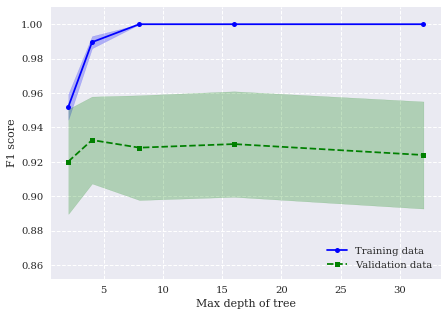

In [0]:
# crea un objeto de la clase DecisionTreeClassifier
clf = 

# set the name (a str) of the hyperparameter you want to vary
param_name = 

# set the parameter values for the hyperparameters
param_range = 


train_scores, val_scores = validation_curve(
    clf,
    X_train,
    y_train,
    param_name=param_name,
    param_range=param_range,
    cv=10,
    scoring='f1',
    n_jobs=1
)

# compute the mean of train and val scores across different values
# for the hyperparameter
mean_train_scores = 
mean_val_scores = 

# compute the standard deviation of train and val scores across
# different values for the hyperparameter
std_train_scores = 
std_val_scores = 


fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.plot(
    param_range, mean_train_scores, color='blue',
    marker='o', linestyle='-', markersize=5, 
    label='Training data'
)

ax.fill_between(
    param_range, mean_train_scores + std_train_scores,
    mean_train_scores - std_train_scores, alpha=0.25,
    color='blue'
)

ax.plot(
    param_range, mean_val_scores, color='green',
    marker='s', linestyle='--', markersize=5, 
    label='Validation data'
)

ax.fill_between(
    param_range, mean_val_scores + std_val_scores,
    mean_val_scores - std_val_scores, alpha=0.25,
    color='green'
)

ax.set_xlabel('Max depth of tree')
ax.set_ylabel('F1 score')

min_train_scores = np.min(train_scores)
min_val_scores = np.min(val_scores)

ax.set_ylim(min(min_train_scores, min_val_scores) - 0.01, 1.01)
ax.grid(linestyle='--')
ax.legend(loc='lower right')

**Ejercicio 3:** realiza una curva de aprendizaje para para el árbol de decisión. Consulta la documentación de [learning_curve](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve)

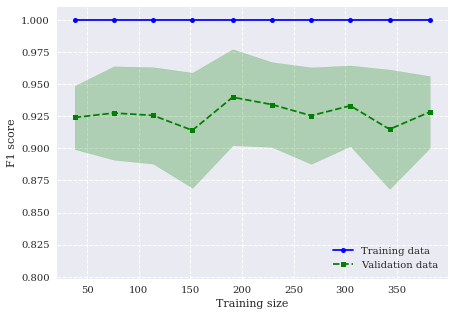

In [0]:
# crea un objeto de la clase DecisionTreeClassifier
clf = 

# define los porcentajes de los datos de entrenamiento a usar
train_sizes = 

train_sizes_abs, train_scores, val_scores = learning_curve(
    clf,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=10,
    scoring='f1',
    n_jobs=1
)

# completa el resto del código!!